# **INFERENCIA ESTADISTICA**
---
## **Introduccion a la graficacion en R**

**Profesor**: *Gonzalo Perez de la Cruz*

**Ayudante**: *Alexis Adrian Carrillo Medina*

**Ayudante**: *Dioney Alonso Rosas Sanchez*

**Ayudante** : *Gerardo Cruz García*

**Ayudante** : *Juan Andrés Cervantes Sandoval*

---

## Introduccion

**Esta clase esta enfocada a la graficacion de datos en R
apartir de bases de una base de datos real graficaremos 
y obtendremos informacion de las graficas.** <br>

Utilizaremos 2 bases de datos: **datos.csv** y **datos2.csv** <br>
Las pueden descargar en la siguiente liga: [Bases de datos](https://drive.google.com/drive/folders/1jfCQEwpVRWgPDK2iJmFYtgQXniFeHoJ6?usp=sharing)

R cuenta con 4 sistemas de graficacion.  <br>
*base graphics, grid graphics, lattice graphics, y ggplot2*.  <br>
Para este curso utilizaremos base graphics, no sin antes exhortarlos
a indagar sobre los graficos *ggplot2* que son los que mas se utilizan en la practica.

## Antes de iniciar

Recuerden que antes de iniciar un nuevo script de R es recomendable
borrar todos los objetos del ambiente para no causar errores.
Para ello podemos ejecutar el siguiente codigo

In [ ]:
rm(list = ls(all.names =  TRUE)) 
gc()

Para esta clase utilizaremos las siguientes librerias

In [1]:
library(readr) #para utilizar la funci?n read_csv
library(corrplot) #para el grafico de correlaciones
library(fdth) #para el calculo de distribuci?n de frecuencias
library(car) #para utilizar qqPlot

corrplot 0.84 loaded


Attaching package: ‘fdth’


The following objects are masked from ‘package:stats’:

    sd, var


Loading required package: carData



Para poder cargar nuestra base de datos necesitamos cambiar el 
directorio de trabajo a donde se encuentre nuesta base de datos. <br>
En este ejemplo yo puse mi directorio, pero es necesario que ustedes pongan el directorio donde guardaron las bases de datos

In [2]:
setwd("/home/a-carrillo/Documents/Escuela/Ayudantias/Inferencia estadistica/R/Ayudantia 1")

Carguemos nuestro base de datos

In [3]:
datos = read_csv("datos.csv") # guardamos en una variable "datos"

Parsed with column specification:
cols(
  ENT = col_double(),
  Entidad = col_character(),
  MUN = col_double(),
  Municipio = col_character(),
  Alf = col_double(),
  Asi = col_double(),
  EBC = col_double(),
  Der = col_double(),
  Pis = col_double(),
  San = col_double(),
  Agu = col_double(),
  Dre = col_double(),
  Ele = col_double(),
  Lav = col_double(),
  Ref = col_double(),
  Ing = col_double()
)



Para comprender la estructura de la base de datos

In [4]:
str(datos) 

tibble [245 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ENT      : num [1:245] 1 1 1 1 2 2 2 2 3 3 ...
 $ Entidad  : chr [1:245] "Aguascalientes" "Aguascalientes" "Aguascalientes" "Aguascalientes" ...
 $ MUN      : num [1:245] 1 3 5 7 1 2 3 4 1 2 ...
 $ Municipio: chr [1:245] "Aguascalientes" "Calvillo" "Jesús María" "Rincón de Romos" ...
 $ Alf      : num [1:245] 0.979 0.952 0.968 0.965 0.964 ...
 $ Asi      : num [1:245] 0.965 0.956 0.959 0.977 0.966 ...
 $ EBC      : num [1:245] 0.736 0.507 0.66 0.676 0.66 ...
 $ Der      : num [1:245] 0.854 0.903 0.859 0.892 0.862 ...
 $ Pis      : num [1:245] 0.995 0.989 0.991 0.991 0.986 ...
 $ San      : num [1:245] 0.991 0.987 0.987 0.967 0.853 ...
 $ Agu      : num [1:245] 0.993 0.99 0.991 0.984 0.927 ...
 $ Dre      : num [1:245] 0.995 0.991 0.993 0.974 0.912 ...
 $ Ele      : num [1:245] 0.998 0.994 0.995 0.992 0.986 ...
 $ Lav      : num [1:245] 0.863 0.845 0.846 0.782 0.796 ...
 $ Ref      : num [1:245] 0.947 0.927 0.919 0.886 0.913 .

Ver el encabezado de nuestra base de datos

In [5]:
head(datos)

ENT,Entidad,MUN,Municipio,Alf,Asi,EBC,Der,Pis,San,Agu,Dre,Ele,Lav,Ref,Ing
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aguascalientes,1,Aguascalientes,0.9794300,0.9652139,0.7362548,0.8540276,0.9945157,0.9905164,0.9933649,0.9951757,0.9978071,0.8627699,0.9468805,15862.251
1,Aguascalientes,3,Calvillo,0.9521950,0.9560942,0.5067098,0.9033228,0.9894113,0.9873641,0.9904701,0.9913172,0.9942821,0.8453339,0.9272201,12184.698
1,Aguascalientes,5,Jesús María,0.9675548,0.9587029,0.6599699,0.8594334,0.9907879,0.9869091,0.9905455,0.9927273,0.9950130,0.8459567,0.9191688,23820.588
1,Aguascalientes,7,Rincón de Romos,0.9649133,0.9773307,0.6759579,0.8917998,0.9907506,0.9674224,0.9842023,0.9739707,0.9919784,0.7824343,0.8855693,8753.307
2,Baja California,1,Ensenada,0.9643934,0.9662187,0.6596109,0.8619705,0.9855645,0.8533928,0.9266327,0.9117085,0.9859258,0.7959839,0.9129551,14037.231
2,Baja California,2,Mexicali,0.9845785,0.9695408,0.7295352,0.8452478,0.9918143,0.9510441,0.9870668,0.9667437,0.9922208,0.8641671,0.9659203,17977.196


Para poder entender la base de datos, necesitamos una descripcion


### Descripcion de la base de datos

Hay que entender como esta conformada la base de datos:

Municipios del pais y conjuntos de variables sociodemograficas relevantes. <br>
**ENT**: Clave de la entidad <br>
**Entidad**: nombre de la entidad <br>
**MUN**: nombre del municipio <br>
**Municipio**: porcentaje de viviendas particulares habitadas con piso de tierra. <br>
**Alf**: porcentaje de poblaci?n de 15 o m?s a?os que sabe leer y escribir. <br>
**Asi**: porcentaje de poblaci?n de 6 a 14 a?os que asiste a la escuela. <br>
**EBC**: porcentaje de poblaci?n de 15 o m?s a?os con educaci?n b?sica completa. <br>
**Der**: porcentaje de poblaci?n con derechohabiencia a servicios de salud. <br>
**Pis**: porcentaje de viviendas particulares habitadas con piso diferente de tierra.<br>
**San**: porcentaje de viviendas particulares habitadas que disponen de excusado o sanitario.<br>
**Agu**: porcentaje de viviendas particulares habitadas que no disponen de agua potable.<br>
**Dre**: porcentaje de viviendas particulares habitadas que no disponen de drenaje.<br>
**Ele**: porcentaje de viviendas particulares habitadas que no disponen de electricidad.<br>
**Lav**: porcentaje de viviendas particulares habitadas que disponen de lavadora.<br>
**Ref**: porcentaje de viviendas particulares habitadas que disponen de refrigerador.<br>
**Ing**: Estimacion de la media del ingreso corriente mensual en los hogares.<br>

## Graficos

Lo primero que se nos podria ocurrir es graficar los datos <br>
La funcion **plot()** es la funcion generica para realizar graficos en 
primera instancia, R desplegara el grafico que considere mas adecuado 
para el tipo de variable que se esta tomando


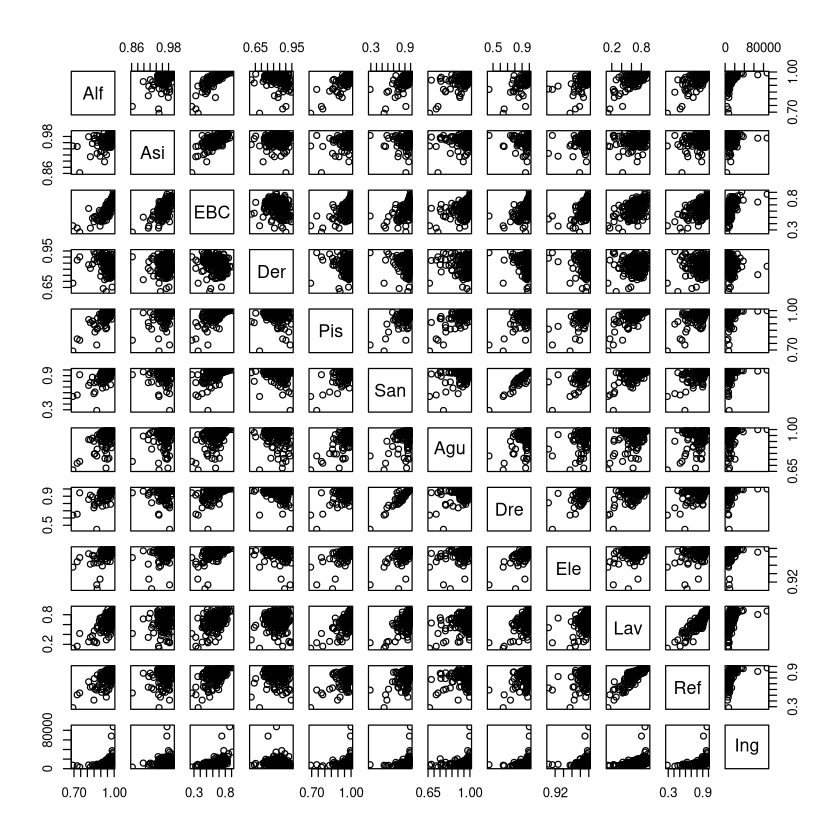

In [6]:
plot(datos[,5:16])

En este caso realiza un grafico de dispersion de todas las variables 2 a 2. <br>
Esta grafica no nos dice mucho e incluso es dificil de leer


Talvez es mas conveniente si encontramos relaciones entre las variables <br>
Esto lo haremos con la ayuda de la funcion **corrplot()**

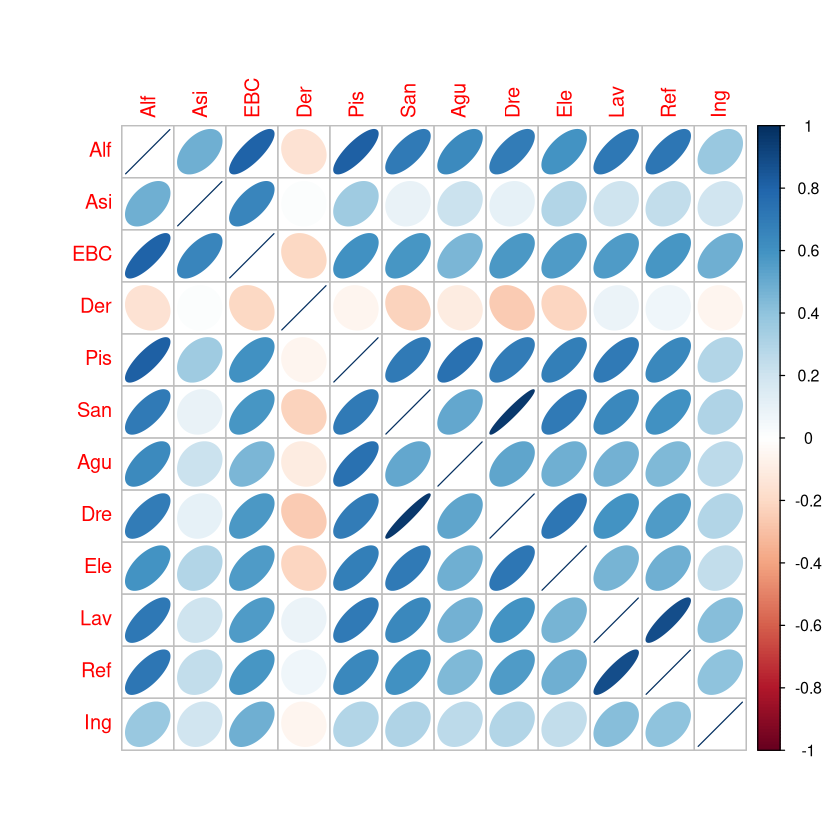

In [7]:
cor_datos = cor(datos[,5:16])
corrplot(cor_datos,method = "ellipse")

La grafica es mas legible, no obstante aun no es algo digno
de presentar

Sera mas sencillo si nos enfocamos en una variable en particular. <br>
Seleccionemos la variable ***Lav***, parece comportarse bien

veamos un grafico de los datos de esta variable

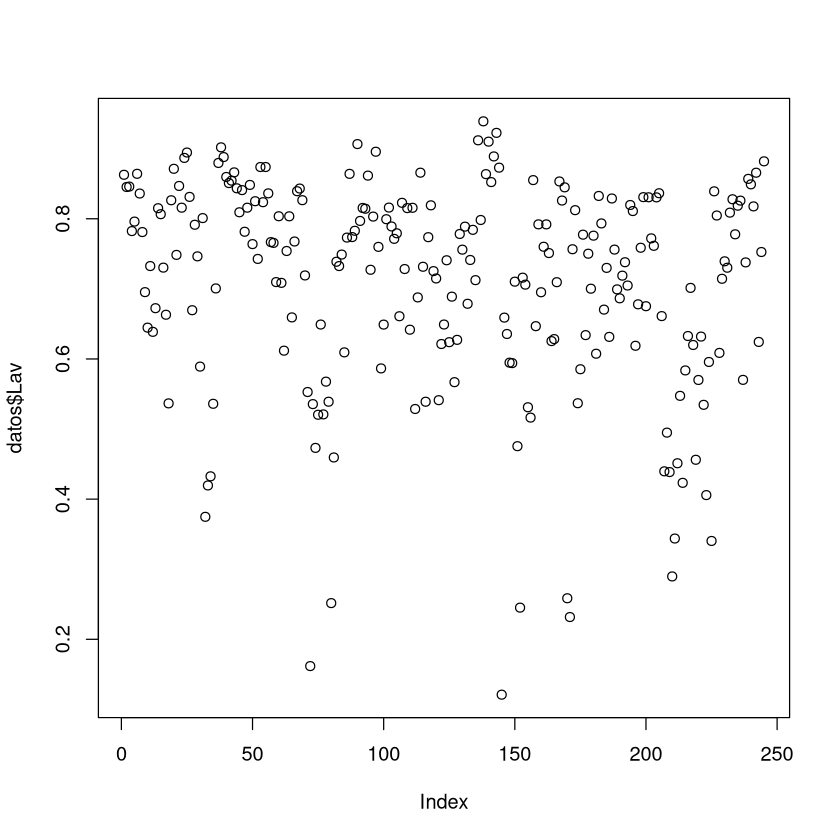

In [8]:
plot(datos$Lav) 

De nuevo, esto no nos dice nada... <br>
Para poder conocer mejor este variable necesitaremos presentar mas graficos

### Graficos para variables aleatorias continuas

#### Histograma

Para cada valor, categoria o clase de la variable, se asocia una barra
cuya altura es la frecuencia con la que se observa la categoria

Histograma de frecuencias absolutas para la variable Lav

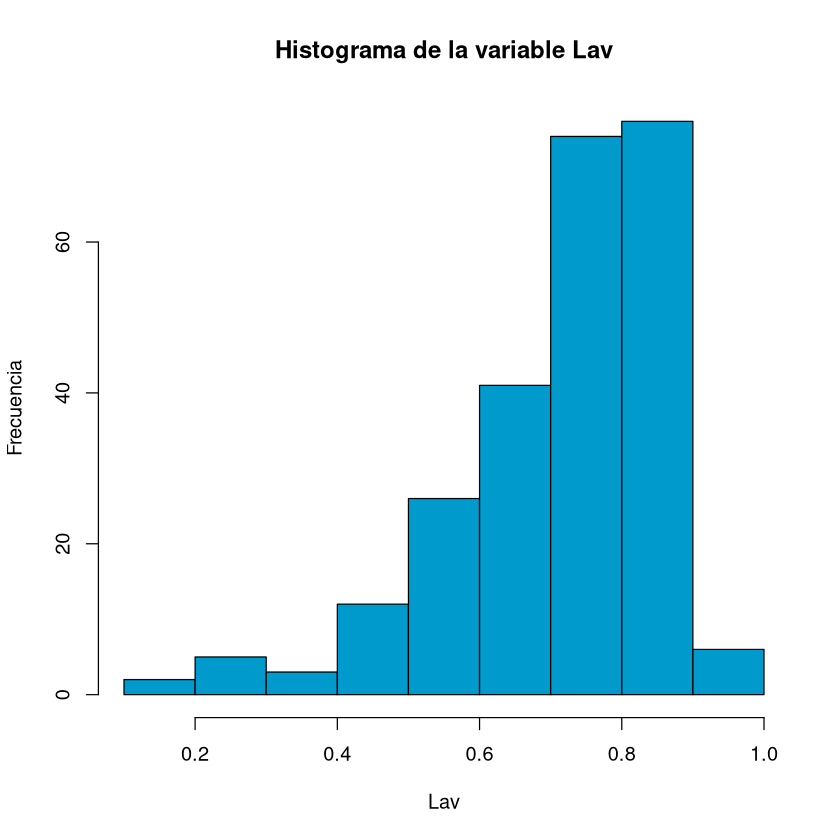

In [9]:
hist(datos$Lav, main="Histograma de la variable Lav",xlab = "Lav",
     ylab = "Frecuencia",col="deepskyblue3")

Histograma de frecuencias relativas para la variable Lav

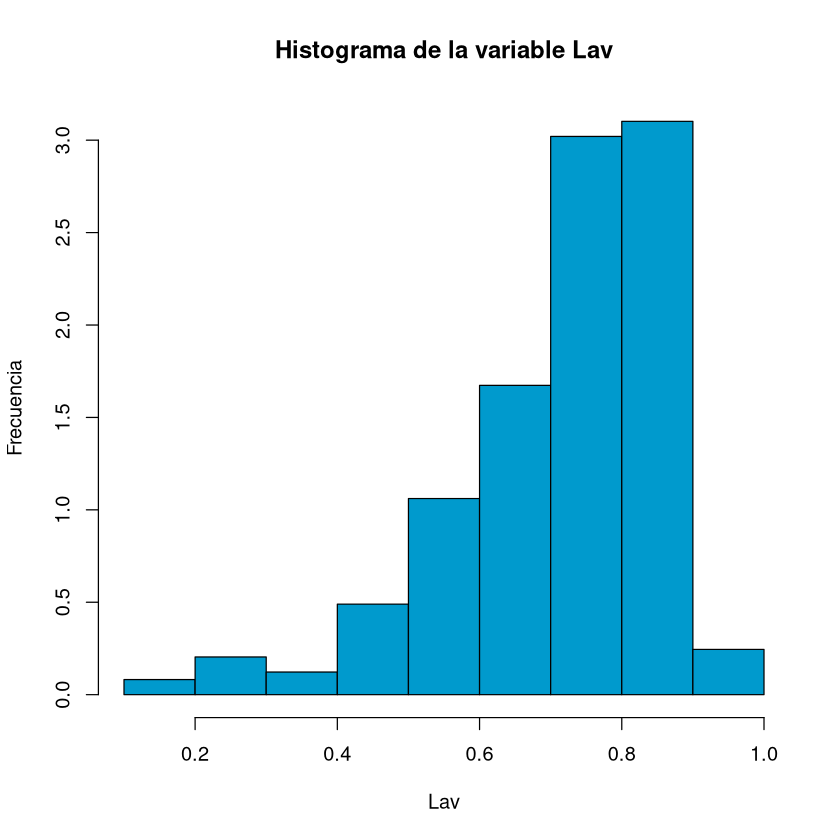

In [10]:
hist(datos$Lav, main="Histograma de la variable Lav",xlab = "Lav",
     ylab = "Frecuencia",col="deepskyblue3",freq = F)

Podemos ver la densidad teorica de nuestra variable de interes con la funcion
**lines()**, la cual agrega curvas a la ultima grafica hecha. <br>
En este caso agregaremos la densidad y esto se hace con la funcion
**density()**

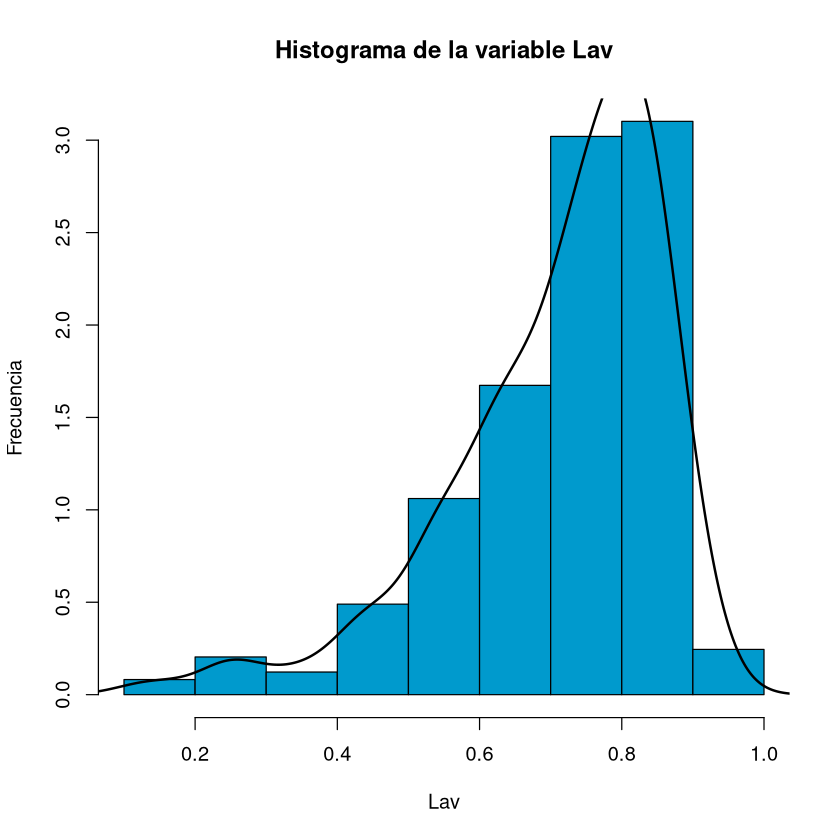

In [12]:
hist(datos$Lav, main="Histograma de la variable Lav",xlab = "Lav",
     ylab = "Frecuencia",col="deepskyblue3",freq = F)
lines(density(datos$Lav),lwd=2)

O bien verla sin el histograma

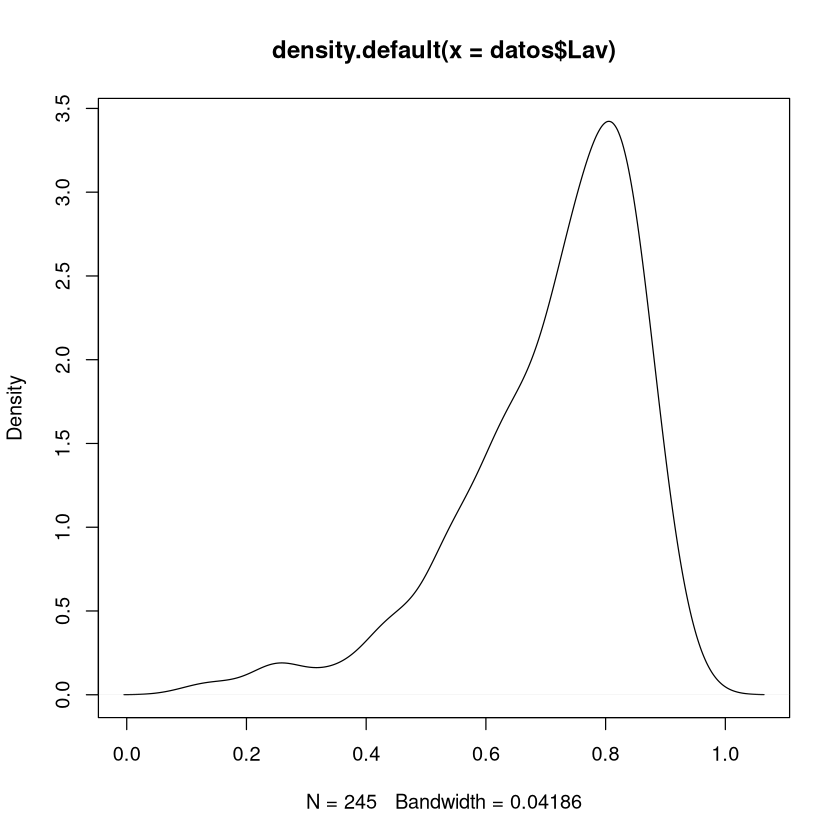

In [13]:
plot(density(datos$Lav))

Tambien podemos calcular la funcion de distribucion empirica <br>
Aqui la calculamos de manera artesanal

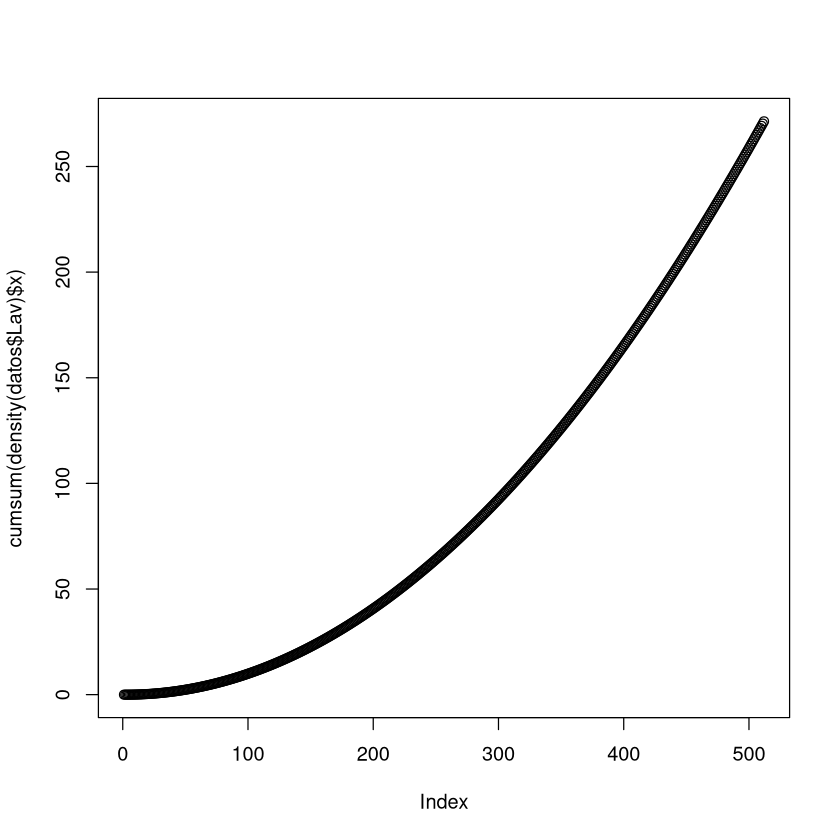

In [14]:
plot(cumsum(density(datos$Lav)$x))

Para hacer que se vea como una linea agregamos el parametro **type = "l"**

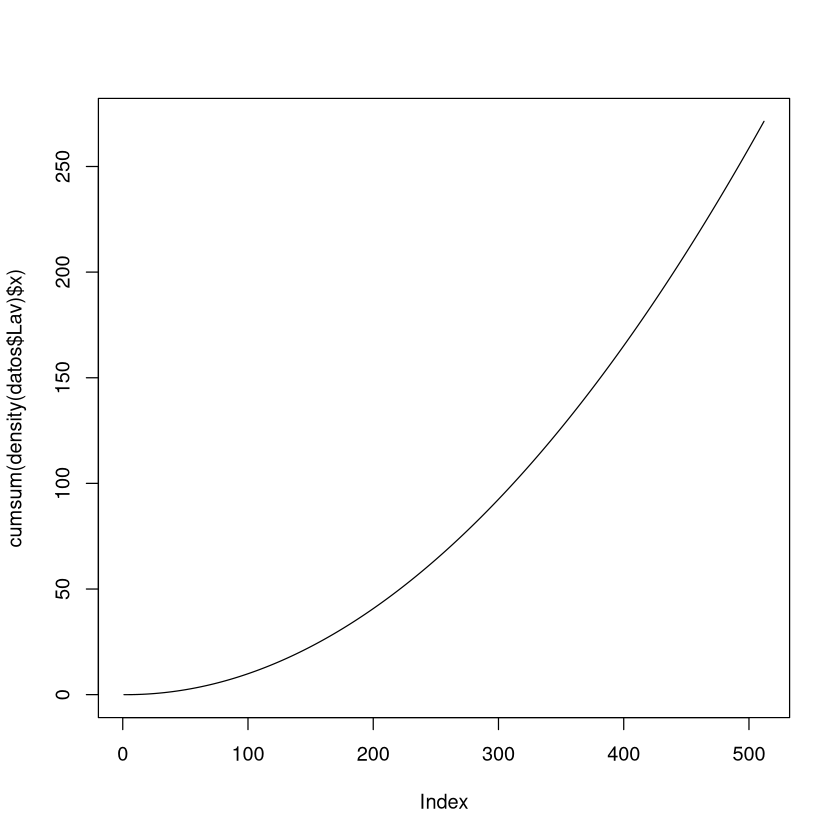

In [16]:
plot(cumsum(density(datos$Lav)$x),type="l")

Una alternativa mejor es utilizar las funciones de la libreria ***fdth***

In [17]:
dist <- fdt(datos$Lav,breaks="Sturges")
dist #nos brinda una tabla con los calculos de la distribuci?n de frecuencias.

Class limits,f,rf,rf(%),cf,cf(%)
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"[0.1198,0.2119)",2,0.008163265,0.8163265,2,0.8163265
"[0.2119,0.3039)",5,0.020408163,2.0408163,7,2.8571429
"[0.3039,0.396)",3,0.012244898,1.2244898,10,4.0816327
"[0.396,0.4881)",11,0.044897959,4.4897959,21,8.5714286
"[0.4881,0.5801)",20,0.081632653,8.1632653,41,16.7346939
"[0.5801,0.6722)",38,0.155102041,15.5102041,79,32.2448980
"[0.6722,0.7643)",56,0.228571429,22.8571429,135,55.1020408
"[0.7643,0.8563)",83,0.338775510,33.8775510,218,88.9795918
"[0.8563,0.9484)",27,0.110204082,11.0204082,245,100.0000000


Donde: <br>
**f** = frecuencia absoluta <br>
**rf** = frecuencia relativa <br>
**rf(%)** = frecuencia relativa porcentual <br>
**cf** = frecuencia acumulada <br>
**cf(%)** = frecuencia acumulada porcentual <br>

Histograma de frecuencias acumulada

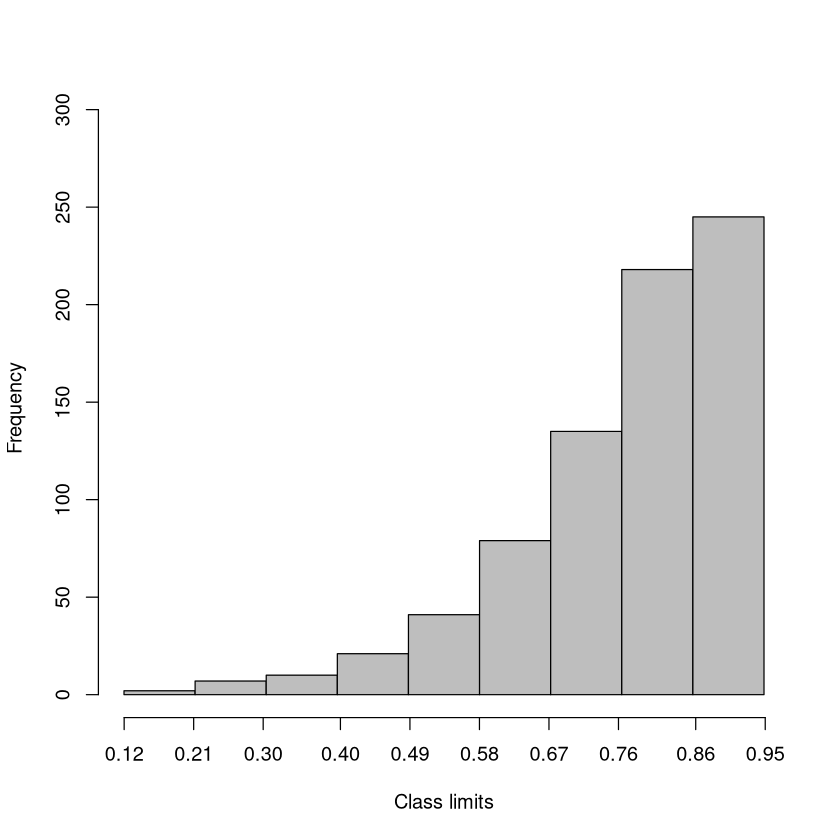

In [18]:
plot(dist, type="cfh")

Poligono de frecuencias acumulado

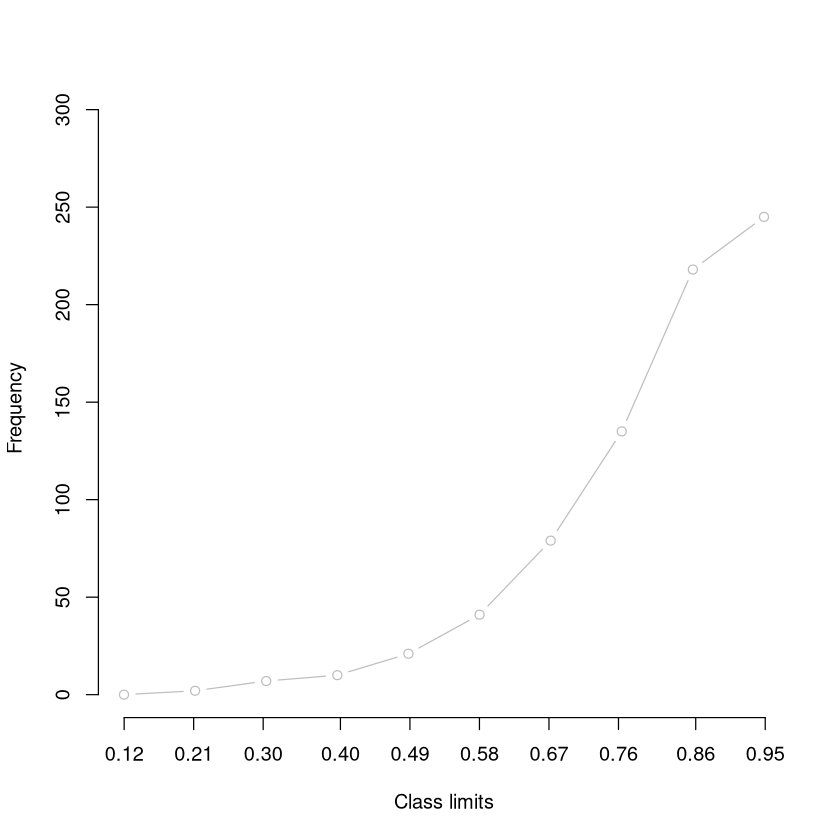

In [19]:
plot(dist, type="cfp")

#### Boxplot

Tambien conocido como diagrama de caja y bigote. <br>
Es un metodo estandarizado para representar graficamente una serie de datos
numericos a traves de sus cuartiles. A su vez nos sirve a encontrar datos atipicos

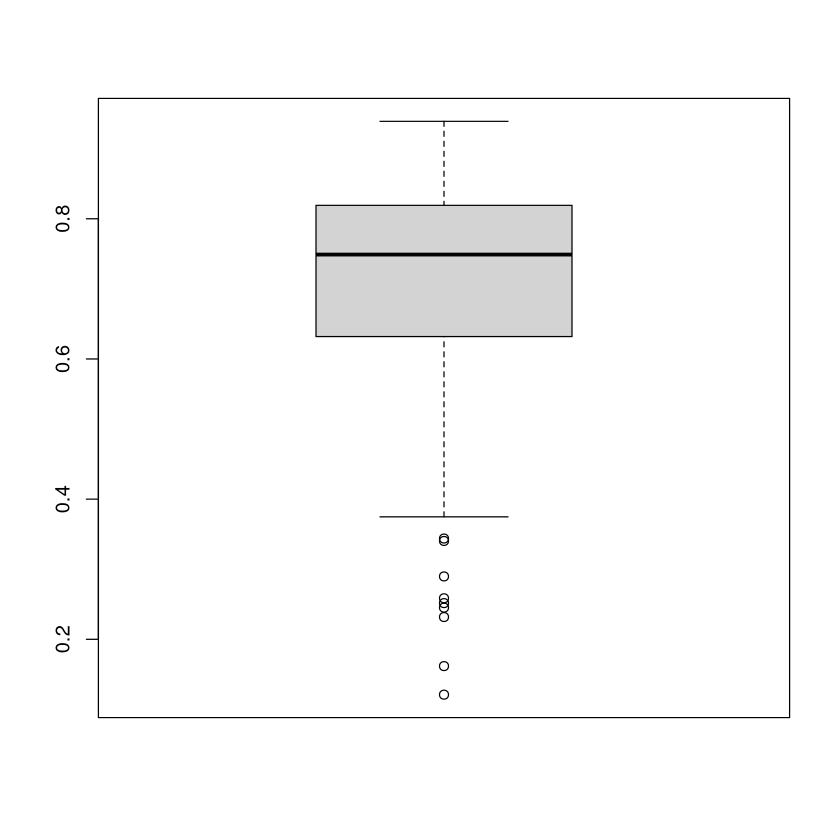

In [20]:
boxplot(datos$Lav)

Podemos verificar la construccion del
boxplot, viendo un resumen de nuestra 
variable 

In [22]:
summary(datos$Lav)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1210  0.6319  0.7489  0.7101  0.8192  0.9390 

Podemos hacer los boxplots para todas las variables

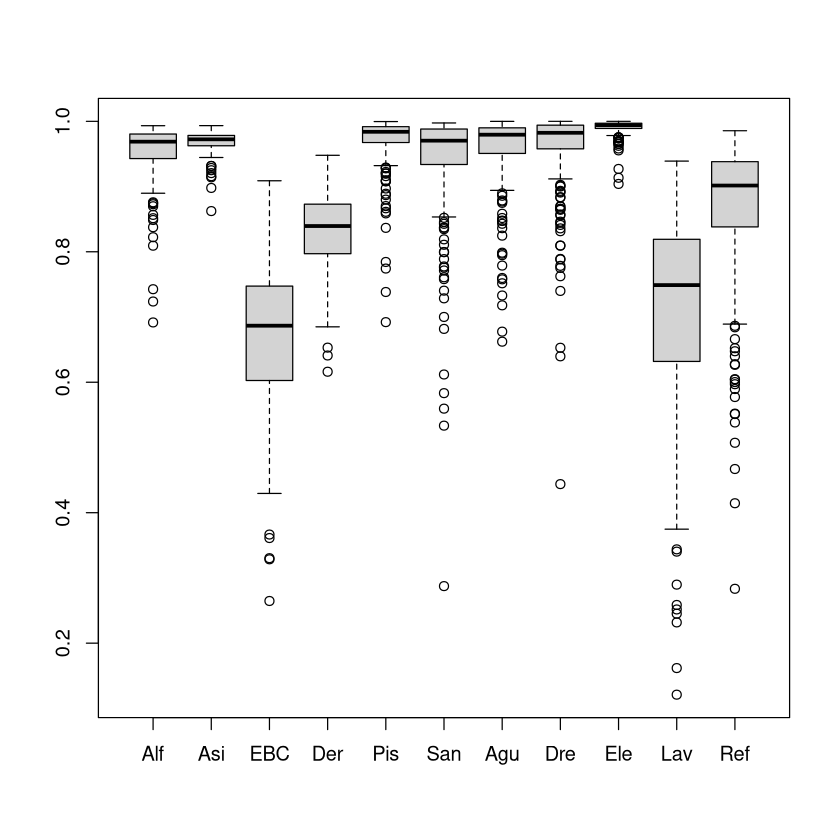

In [23]:
boxplot(datos[,c(5:15)])

#### qqPlot

Tambien conocidos como graficos cuantil-cuantil <br>
Se utiliza para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación.

Veamos un grafico *qqPlot*

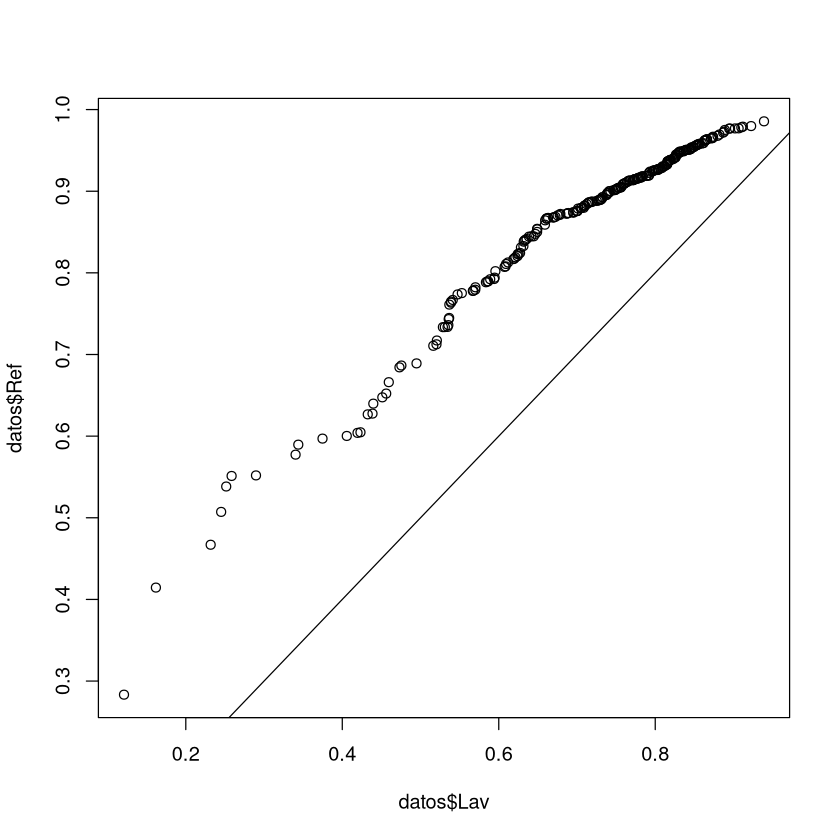

In [27]:
qqplot(datos$Lav, datos$Ref)
abline(0,1) #Para trazar la identidad y ver si sus distribuciones son iguales

Uno de los principales usos del qqplot es ver 
si la distribuci?n de nuestra variable, o bien nuetra base de datos
es normal, graficando los cuantiles teoricos de una dist
normal, contra los cuantiles de la dist teorica de nuestra
variable

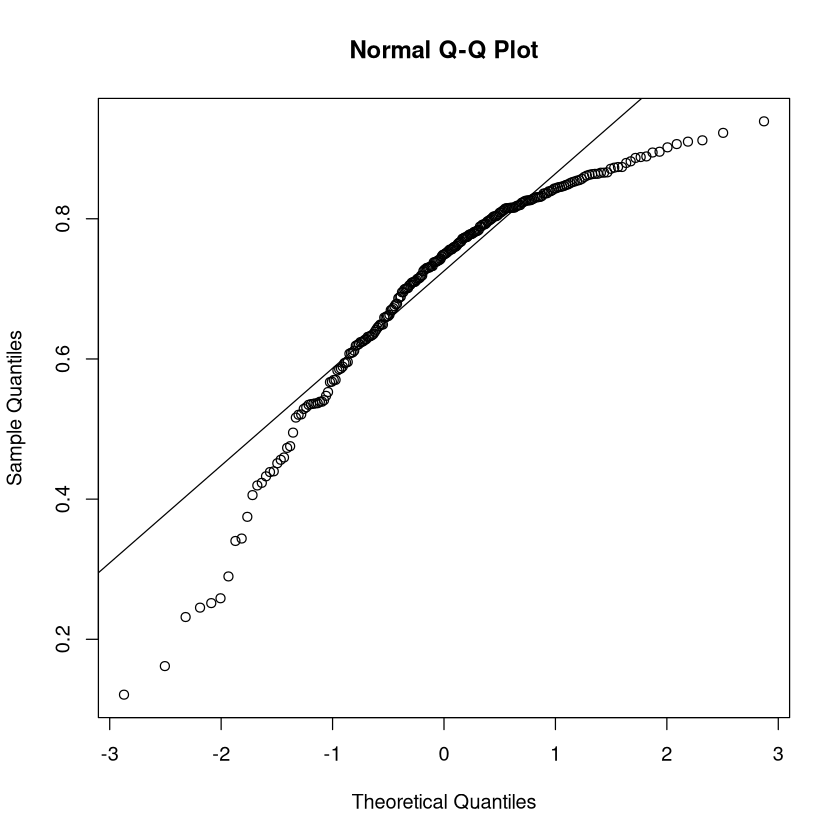

In [29]:
qqnorm(datos$Lav) #Para compararlo con una normal
qqline(datos$Lav) #Para trazar la recta de comparacion

claramente observamos que esto no sigue una dist normal 

Otra manera m?s pr?ctica es con la funcion **qqPlot()** de la library car

[1] 145  72

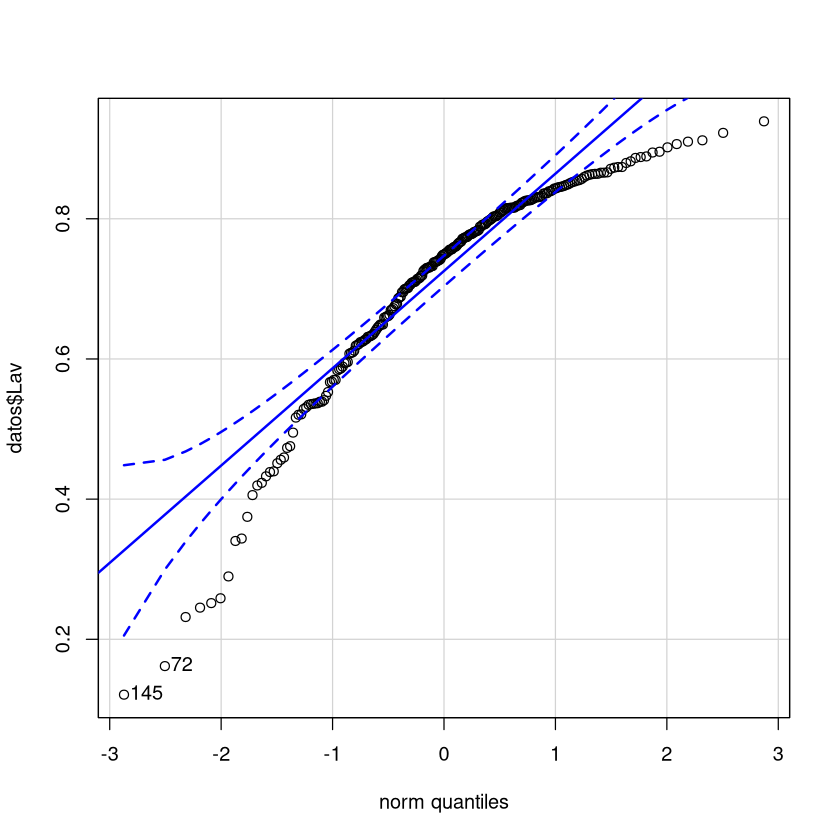

In [30]:
qqPlot(datos$Lav)

### Graficos para variables categoricas

Cargamos nuestra base de datos.

In [31]:
datos2 = read_csv("datos2.csv") # guardamos en una variable "datos2"

Parsed with column specification:
cols(
  sexo = col_double(),
  nivelest = col_double(),
  tabaco = col_double(),
  estcivil = col_double(),
  laboro = col_double(),
  hijos = col_double(),
  edad = col_double(),
  peso = col_double(),
  talla = col_double(),
  imc = col_double(),
  sedentar = col_double(),
  diabm = col_double(),
  hipercol = col_double(),
  pas = col_double(),
  pad = col_double(),
  fc = col_double()
)



Para comprender la estructura de la base de datos

In [32]:
str(datos2)

tibble [536 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ sexo    : num [1:536] 2 1 1 2 1 2 2 2 1 1 ...
 $ nivelest: num [1:536] 1 4 2 1 5 1 3 1 1 3 ...
 $ tabaco  : num [1:536] 2 0 NA 0 2 2 3 0 2 0 ...
 $ estcivil: num [1:536] 3 2 4 2 2 4 3 2 2 2 ...
 $ laboro  : num [1:536] 4 3 3 4 1 3 4 4 3 3 ...
 $ hijos   : num [1:536] 2 1 0 2 3 1 2 3 2 0 ...
 $ edad    : num [1:536] 67 56 81 74 53 79 62 69 68 65 ...
 $ peso    : num [1:536] 72 150 71 85 102 98 76 65.5 80 71.4 ...
 $ talla   : num [1:536] 159 178 158 188 178 146 159 145 170 157 ...
 $ imc     : num [1:536] 29 47.3 30 24 32.2 ...
 $ sedentar: num [1:536] 1 1 1 1 1 1 1 1 NA 1 ...
 $ diabm   : num [1:536] 2 2 2 1 1 2 2 2 2 1 ...
 $ hipercol: num [1:536] 2 2 1 1 1 1 2 1 1 2 ...
 $ pas     : num [1:536] 190 192 190 193 182 195 183 184 180 177 ...
 $ pad     : num [1:536] 100 79 95 90 114 95 84 88 91 84 ...
 $ fc      : num [1:536] 9 53 9 82 73 88 66 99 61 65 ...
 - attr(*, "spec")=
  .. cols(
  ..   sexo = col_double(),
  ..   nivel

Ver el encabezado de nuestra base de datos

In [33]:
head(datos2)

sexo,nivelest,tabaco,estcivil,laboro,hijos,edad,peso,talla,imc,sedentar,diabm,hipercol,pas,pad,fc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,2,3,4,2,67,72,159,29.00000,1,2,2,190,100,9
1,4,0,2,3,1,56,150,178,47.34251,1,2,2,192,79,53
1,2,NA,4,3,0,81,71,158,30.00000,1,2,1,190,95,9
2,1,0,2,4,2,74,85,188,24.04934,1,1,1,193,90,82
1,5,2,2,1,3,53,102,178,32.19290,1,1,1,182,114,73
2,1,2,4,3,1,79,98,146,46.00000,1,2,1,195,95,88


#### Descripcion de la base de datos


Nos centraremos unicamente en el sexo y el estado civil <br>
Para el sexo tenemos: <br>
**1 = Masculino, 2 = Femenino** <br>
Para el estado civil: <br>
**1 =  Soltero, 2 = Casado/Pareja, 3 = Separado, 4 = Viudo**

Contaremos el numero de hombres y mujeres y los uniremos
en un vector

In [35]:
nSexo <- c(sum(datos2$sexo==1),sum(datos2$sexo==2))

Categorizaremos los sexos

In [36]:
Sexo <- c("Masculino", "Femenino")

Calcularemos el porcentaje

In [37]:
porcentaje <- round(nSexo/sum(nSexo)*100)

Lo hacemos bonito

In [38]:
Sexo <- paste(Sexo, porcentaje)
Sexo <- paste(Sexo, " %")

#### Grafica de pastel

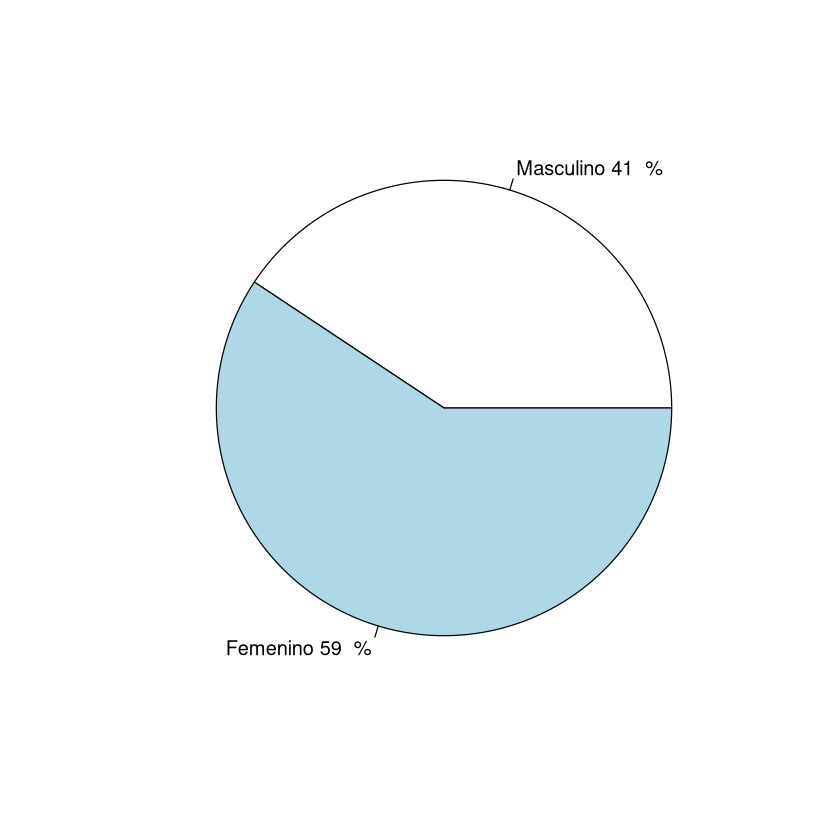

In [39]:
pie(nSexo,labels = Sexo)

#### Grafica de barras
Para ello necesitamos convertir a factor

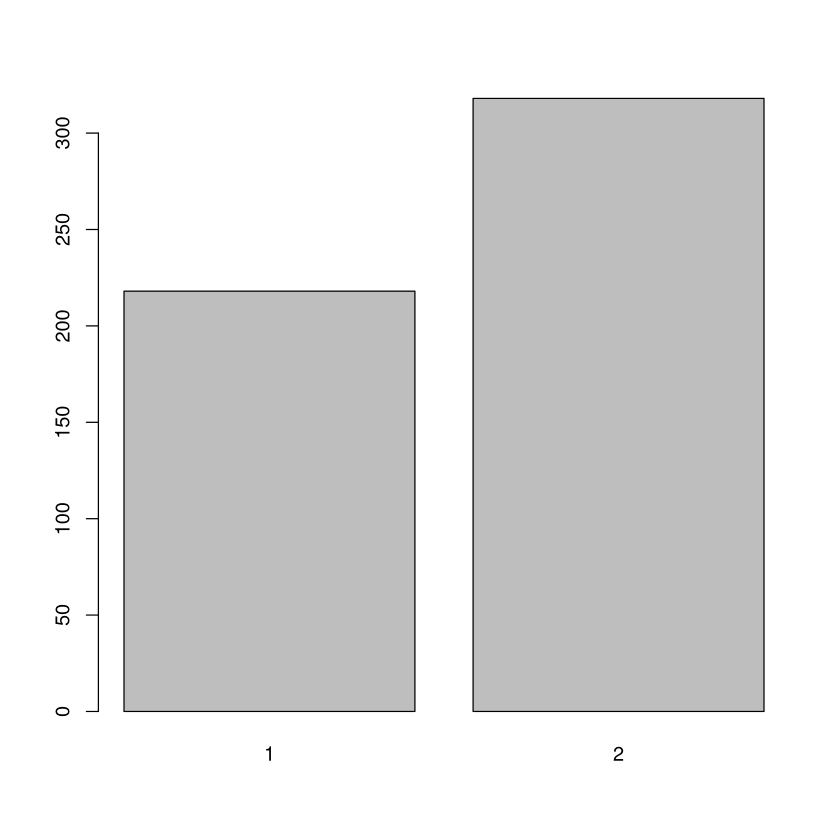

In [41]:
sex <- factor(datos2$sexo)
plot(sex)

La funcion **par()** se utiliza para configuraciones de graficas en general <br>
Con ***mfrow = c(n,m)*** se configura el numero de graficas desplegadas
a la vez

In [42]:
par(mfrow=(c(1,2))) 

##### Graficos de dispersion (puntos y sunflower)

Grafico de puntos

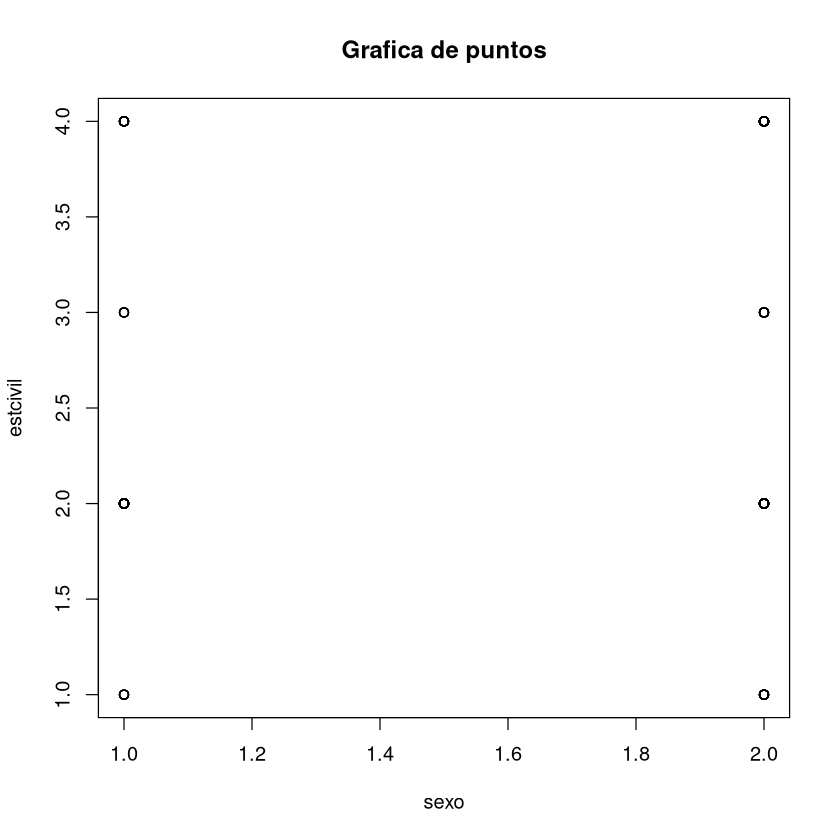

In [44]:
plot(estcivil ~ sexo, data=datos2)
title("Grafica de puntos")

##### Grafico sunflower

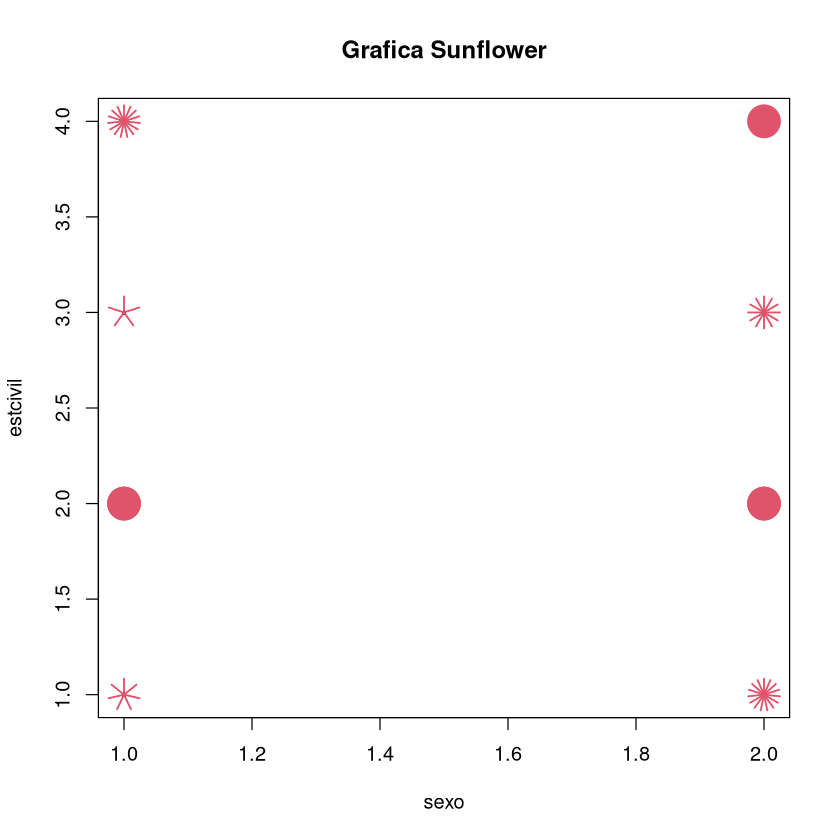

In [45]:
sunflowerplot(estcivil ~ sexo, data=datos2)
title("Grafica Sunflower")

Regresemos las graficas a la normalidad

In [46]:
par(mfrow=(c(1,1)))

##### Mosaicplot

Cuando quieres observar la proporci?n de variables categorica vs categorica

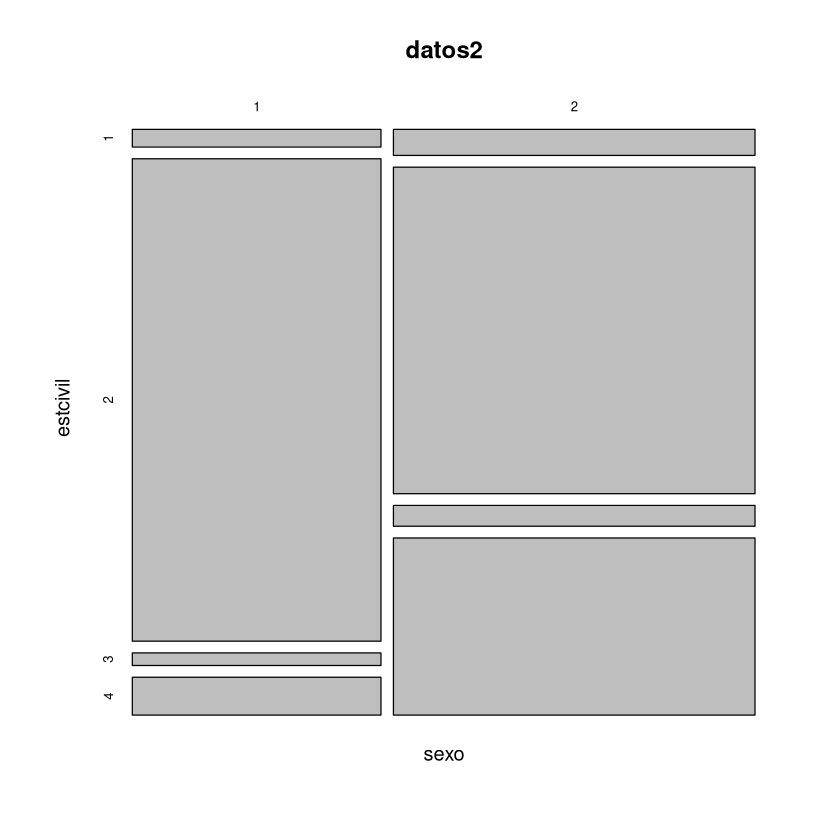

In [47]:
mosaicplot(sexo~estcivil,data=datos2)